In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy.stats import mstats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [2]:
sales = pd.read_csv('WALMART_SALES_DATA.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


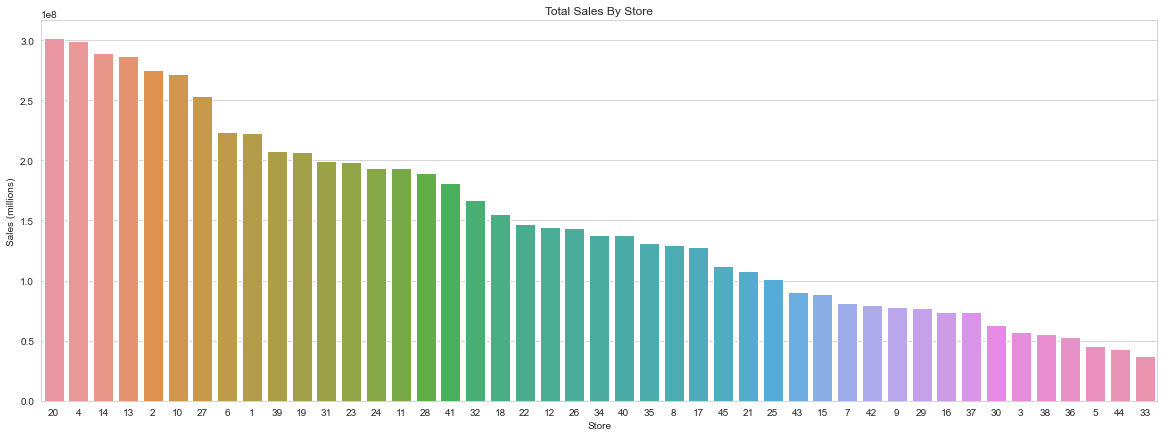

In [5]:
plt.figure(figsize = (20,7))
barplot = sns.barplot(x = 'Store',
           y = 'Weekly_Sales',
           data = sales,
           estimator = np.sum,
           ci = None,
           order = sales.groupby('Store').agg('sum').reset_index().sort_values(by = 'Weekly_Sales', ascending = False)['Store']).set_title('Total Sales By Store')
plt.ylabel('Sales (millions)')
plt.show()


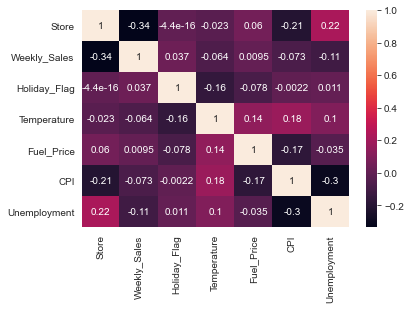

In [7]:
corrMatrix = sales.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

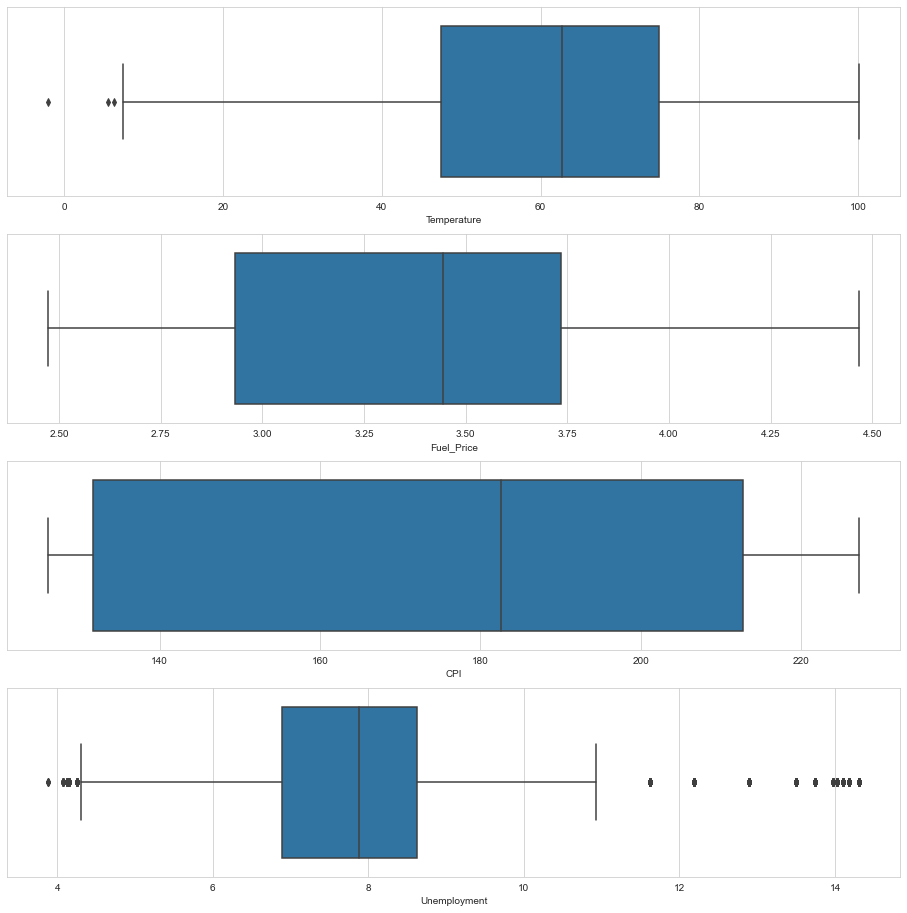

In [11]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = sales[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(sales[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

In [12]:
walmart_data_clean = sales[(sales['Unemployment']<10) & (sales['Unemployment']>4.5) & (sales['Temperature']>10)]
walmart_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


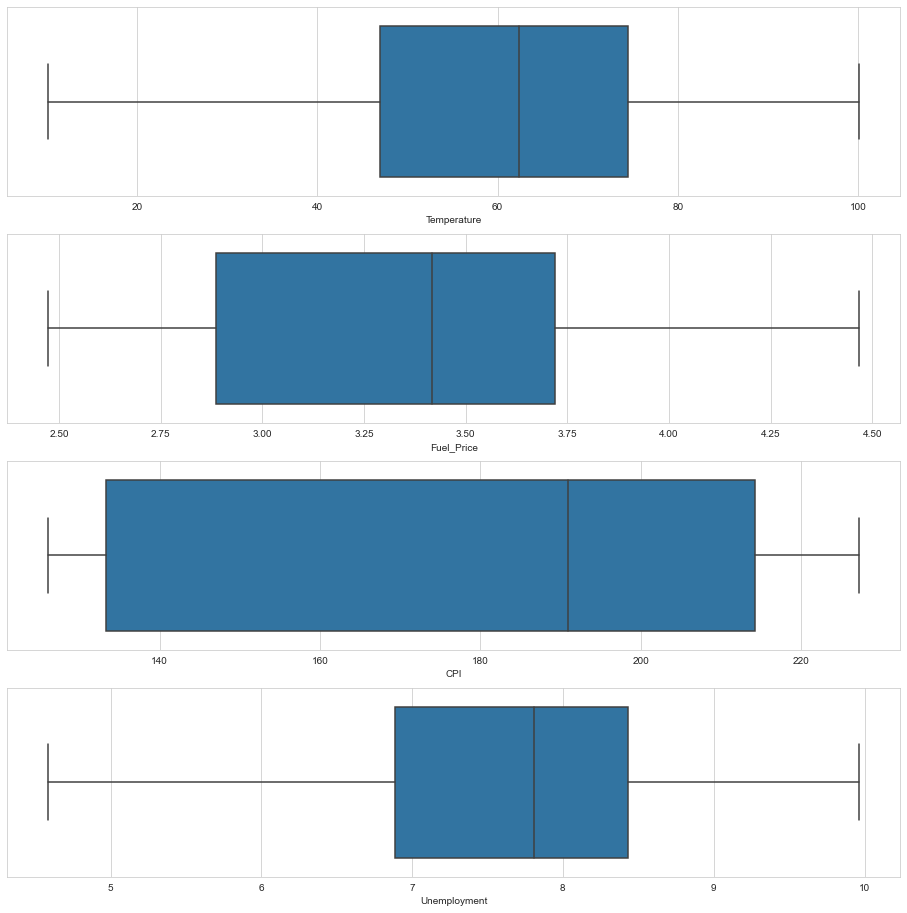

In [13]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

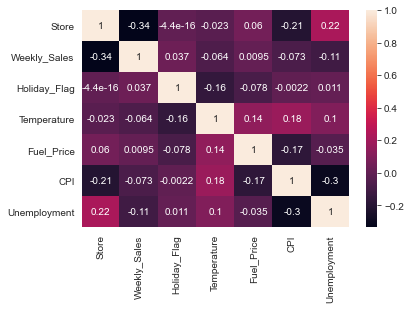

In [14]:
#Regression model 
corrMatrix2 = walmart_data_clean.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = walmart_data_clean[['Store','Fuel_Price','CPI','Unemployment']]
Y = walmart_data_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Linear Regression:

Accuracy: 13.092905550459799
Mean Absolute Error: 454455.9127145724
Mean Squared Error: 299969705485.0964
Root Mean Squared Error: 547694.901825


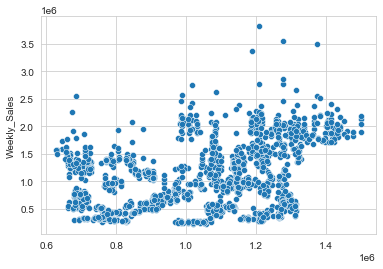

In [27]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

import warnings
warnings.filterwarnings('ignore')

Random Forest Regressor:

Accuracy: 93.47693100981219
Mean Absolute Error: 75935.88578144877
Mean Squared Error: 22213921994.637375
Root Mean Squared Error: 149043.3560902242


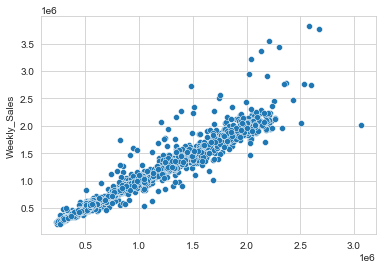

In [23]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)


import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

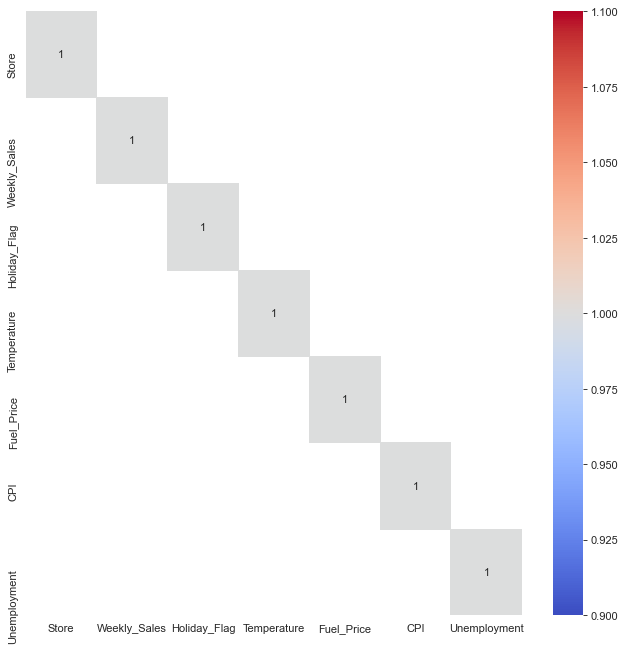

The r code 

data1 <- read.csv("WALMART_SALES_DATA.csv")

#calling libraries 


library("dplyr") #Calling dplyr function for data manipulation 
library("ggplot2") # for data visualisation
library("scales") #for change of scales in data visualisation
library("zoo")
library("tidyverse")
library("tidyr")
library("lubridate")
library(car) #Companion to Applied Regression for Regression Visualisations
require(stats)
library(corrplot)
library(caTools)
library(MLmetrics)
library("repr")

#understanding the data 

head(data1)
str(data1) #- structure of data

summary
summary(data1)

#Checking NA values 
colSums(is.na(data1)) #Observed no NA values



#creating same data for alterations
data4 <- data1

#selecting only first store as prediction Required only for first Store
data4<- dplyr::filter(data4, Store ==1)

#changing date column in dataframe to date format & arranging in ascending order as per dates
data4$Date <- lubridate::dmy(data4$Date)
data4 <- dplyr::arrange(data4,Date)

#Creating a week number,month,quarter column in dataframe
data4$Week_Number <- seq(1:length(unique(data4$Date)))

#adding quarter & month columns
data4$month <- lubridate::month(data4$Date)
data4$quarter <- lubridate::quarter(data4$Date)




##Creating a event type dataframe##

holliday- date

Holiday_date <- c("12-02-2010", "11-02-2011", "10-02-2012", "08-02-2013","10-09-2010", "09-09-2011", "07-09-2012", "06-09-2013","26-11-2010", "25-11-2011", "23-11-2012", "29-11-2013","31-12-2010", "30-12-2011", "28-12-2012", "27-12-2013")

#assigning date format to Holiday_date vector
Holiday_date <- lubridate::dmy(Holiday_date)

#Creating Events vector
Events <-c(rep("Super Bowl", 4), rep("Labour Day", 4),rep("Thanksgiving", 4), rep("Christmas", 4))

#Creating dataframe with Events and date
Holidays_Data <- data.frame(Events,Holiday_date)

#merging both dataframes
data4<-merge(data4,Holidays_Data, by.x= "Date", by.y="Holiday_date", all.x = TRUE)

#Replacing null values in Event with No_Holiday
data4$Events = as.character(data4$Events)
data4$Events[is.na(data4$Events)]= "No_Holiday"


#linear regression graph
par(mfrow=c(3,3))
for(i in 3:11){
  plot(data4[,i], 
       data4$Weekly_Sales,
       main=names(data4[i]), 
       ylab="Weekly Sales", xlab =" ",
       col='red',
  abline(lm(data4[,i] ~ data4$Weekly_Sales, data = data4), col = "blue"))
}

#Boxplot for checking outliers & removing them
par(mfrow=c(1,1))

#Creating a dataframe for outlier treatment
data5 <- data4

#As we are predicting sales, Thought of removing outliers in Sales based on Various parameters
#Temperature Outlier treatment -- found 5 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$Temperature, pretty(data5$Temperature)), main="Temperature vs Weekly Sales", xlab ="Temperature", ylab="Weekly Sales", cex.axis=0.5, col="Steel Blue")
outliers_temp <- boxplot(data5$Weekly_Sales ~ cut(data5$Temperature, pretty(data5$Temperature)), main="Temperature vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_temp),]

#CPI Outlier treatment-found 1 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$CPI, pretty(data5$CPI)), main="CPI vs Weekly Sales",xlab ="CPI", ylab="Weekly Sales", cex.axis=0.5,col="Steel Blue")
outliers_CPI <- boxplot(data5$Weekly_Sales ~ cut(data5$CPI, pretty(data5$CPI)), main="CPI vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_CPI),]

#Unemployment outlier treatment--found 3 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$Unemployment, pretty(data5$Unemployment)), main="Unemployment vs Weekly Sales",xlab ="Unemployment", ylab="Weekly Sales",  cex.axis=0.5,col="Steel Blue")
outliers_Unemployment <- boxplot(data5$Weekly_Sales ~ cut(data5$Unemployment, pretty(data5$Unemployment)), main="Unemployment vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_Unemployment),]

#fuel price outlier treatment -- found 2 outliers and removed
boxplot(data5$Weekly_Sales ~ cut(data5$Fuel_Price, pretty(data5$Fuel_Price)), main="Fuel_Price vs Weekly Sales", xlab ="Fuel Price", ylab="Weekly Sales", cex.axis=0.5,col="Steel Blue")
outliers_fuel_price <- boxplot(data5$Weekly_Sales ~ cut(data5$Fuel_Price, pretty(data5$Fuel_Price)), main="Fuel_Price vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_fuel_price),]

#Outlier treatment for Holiday Flag - No outliers found
boxplot(data5$Weekly_Sales ~ data5$Holiday_Flag, main = 'Weekly Sales - Holiday_Flag',xlab ="Holiday Flag", ylab="Weekly Sales",col="Steel Blue" )

#outlier treatment for month - 4 outliers found and removed
boxplot(data5$Weekly_Sales ~ data5$month, main = 'Weekly Sales - month', xlab ="Month", ylab="Weekly Sales", col="Steel Blue")
outliers_month <- boxplot(data5$Weekly_Sales ~ data5$month, main = 'Weekly Sales - month',plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_month),]

#outlier treatment for quarter - 2 outliers found and removed
outliers_quarter <- boxplot(data5$Weekly_Sales ~ data5$quarter, main = 'Weekly Sales - quarter',xlab ="Quarters", ylab="Weekly Sales", col="Steel Blue")$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_quarter),]





#Removing unnecessary columns and changing structure of Events
data5$Date <-NULL
data5$Store <- NULL
data5$Events <- as.factor(data5$Events)
str(data5)

data5$Holiday_Flag <- as.numeric(data5$Holiday_Flag)
data5$Week_Number <- as.numeric(data5$Week_Number)
data5$quarter <- as.numeric(data5$quarter)



#correlation matrix and corr plot
corr = cor(data5[, c(1:9)])
View(corr)



Creating dummys

Events <- as.factor(data5$Events)
dummy_Events <- data.frame(model.matrix(~Events))[,-1]

quarter <- as.factor(data5$quarter)
dummy_quarter <- data.frame(model.matrix(~quarter))[,-1]

month <- as.factor(data5$month)
dummy_month <- data.frame(model.matrix(~month))[,-1]


data5 <- cbind(data5,dummy_Events,dummy_quarter,dummy_month)


analysis 


set.seed(123)
library(caTools) 
dataset <- data5[, c(1,4,6,7,11:12, 17:27 )]
sample = sample.split(dataset, SplitRatio = 0.7)                  # Returns a vector with T for 70% of data
trainingSet = subset(dataset, sample == T)
testSet = subset(dataset, sample == F)
model = lm(formula = Weekly_Sales ~ . , data = trainingSet)
summary(model)